In [395]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
os.chdir(r'C:\Users\Chandramoulli\Desktop\Coursework\Sem 1\Applied Data Science\Lab 1')
def read_csv(filename):
    if os.path.exists(filename):
        with open(filename) as file:
            f=file.read().splitlines()
        keys=f[0].split(',')
        data_dict={}
        for i in range(len(keys)):
            data=[]
            if i==0:
                key=keys[i][4:-1]
                for j in range(1,len(f)):
                    data.append(f[j].split(',')[i][1:-1])
                data_dict[key]=data
            else:
                key=keys[i][1:-1]
                for j in range(1,len(f)):
                    data.append(float(f[j].split(',')[i]))
                data_dict[key]=data
        df=pd.DataFrame.from_dict(data_dict)
        return df
    else:
        print('The file you have requested does not exist')

In [389]:
indoor=read_csv(r'indoor-temperature-last-year.csv')
indoor['DateTime']=pd.to_datetime(indoor['DateTime'],format="%Y-%m-%d %H:%M:%S")
indoor

,DateTime,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
0,2016-10-09,54.0,21.93000,21.0,22.8
1,2016-10-10,52.0,21.77000,20.4,23.6
2,2016-10-11,51.0,21.36000,19.9,23.0
3,2016-10-12,51.0,21.44000,20.0,23.6
4,2016-10-13,52.0,21.22000,20.1,22.3
...,...,...,...,...,...
349,2017-10-05,56.0,21.34000,20.6,22.8
350,2017-10-06,54.0,21.34000,20.3,22.3
351,2017-10-07,55.0,21.34000,20.6,21.9
352,2017-10-08,55.0,21.81000,20.6,23.5


In [142]:
outdoor=read_csv(r'outside-temperature-last-year.csv')
outdoor['DateTime']=pd.to_datetime(outdoor['DateTime'],format="%Y-%m-%d %H:%M:%S")
rainfall=read_csv(r'rainfall-last-year.csv')
rainfall['DateTime']=pd.to_datetime(rainfall['DateTime'],format="%Y-%m-%d %H:%M:%S")
barometer=read_csv(r'barometer-last-year.csv')
barometer['DateTime']=pd.to_datetime(barometer['DateTime'],format="%Y-%m-%d %H:%M:%S")
outdoor.columns=['DateTime','Outdoor Temperature','Outdoor Temperature_range (low)','Outdoor Temperature_range (high)']

In [192]:
df=pd.merge(pd.merge(pd.merge(indoor,outdoor,how='outer',on='DateTime'),rainfall,how='outer',on='DateTime'),barometer,how='outer',on='DateTime')
df.columns=list(df.columns[:2])+['Indoor Temperature','Indoor Temperature_range (low)','Indoor Temperature_range (high)']+list(df.columns[5:])
df

,DateTime,Humidity,Indoor Temperature,Indoor Temperature_range (low),Indoor Temperature_range (high),Outdoor Temperature,Outdoor Temperature_range (low),Outdoor Temperature_range (high),mm,Baro
0,2016-10-09,54.0,21.93000,21.0,22.8,10.66000,7.2,13.8,0.0,1021.9
1,2016-10-10,52.0,21.77000,20.4,23.6,8.94000,5.6,12.8,0.0,1019.9
2,2016-10-11,51.0,21.36000,19.9,23.0,8.69000,5.3,14.3,0.0,1015.8
3,2016-10-12,51.0,21.44000,20.0,23.6,11.55000,9.0,14.9,0.0,1013.2
4,2016-10-13,52.0,21.22000,20.1,22.3,9.40000,6.0,13.3,0.0,1005.9
...,...,...,...,...,...,...,...,...,...,...
350,2017-10-06,54.0,21.34000,20.3,22.3,11.58000,7.2,17.6,0.0,1019.2
351,2017-10-07,55.0,21.34000,20.6,21.9,13.70000,11.7,16.4,1.1,1011.5
352,2017-10-08,55.0,21.81000,20.6,23.5,13.60000,9.6,21.7,0.0,1013.1
353,2017-10-09,54.0,22.23125,22.2,22.3,13.53125,13.5,13.6,0.0,1013.9


In [392]:
for col in df.columns[1:-1]:
    print('{}'.format(col))
    print('  Min value - {:2f}'.format(min(df[col])))
    print('  Mean value - {:2f}'.format(np.mean(df[col])))
    print('  Std value - {:2f}'.format(np.std(df[col])))
    print('  Max value - {:2f}'.format(max(df[col])))

Indoor Temperature
  Min value - 18.040000
  Mean value - 21.827885
  Std value - 2.055398
  Max value - 29.210000
Indoor Temperature_range (low)
  Min value - 14.900000
  Mean value - 20.555932
  Std value - 2.401725
  Max value - 28.200000
Indoor Temperature_range (high)
  Min value - 19.700000
  Mean value - 23.533616
  Std value - 1.699061
  Max value - 31.100000
Outdoor Temperature
  Min value - -1.810000
  Mean value - 11.138877
  Std value - 5.347494
  Max value - 26.380000
Outdoor Temperature_range (low)
  Min value - -4.100000
  Mean value - 7.865634
  Std value - 4.872053
  Max value - 18.700000
Outdoor Temperature_range (high)
  Min value - 1.500000
  Mean value - 15.524225
  Std value - 7.024531
  Max value - 38.500000
mm
  Min value - 0.000000
  Mean value - 1.548725
  Std value - 3.319887
  Max value - 23.200000
Baro
  Min value - 979.600000
  Mean value - 1009.998873
  Std value - 9.855751
  Max value - 1035.600000


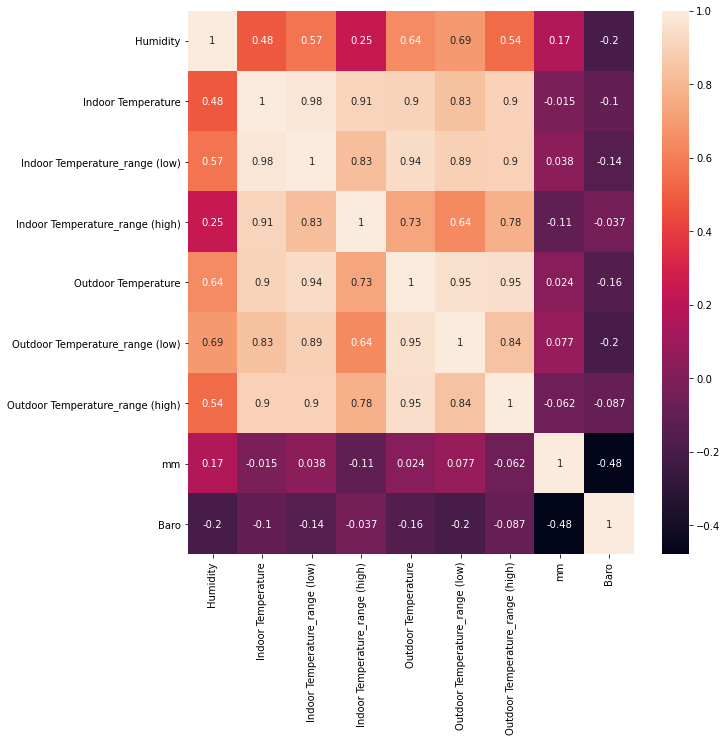

In [398]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.savefig(r'C:\Users\Chandramoulli\Desktop\Coursework\Sem 1\Applied Data Science\Lab 1\Graphs and Results\Correlation plot.png')

Text(0, 0.5, 'Rainfall')

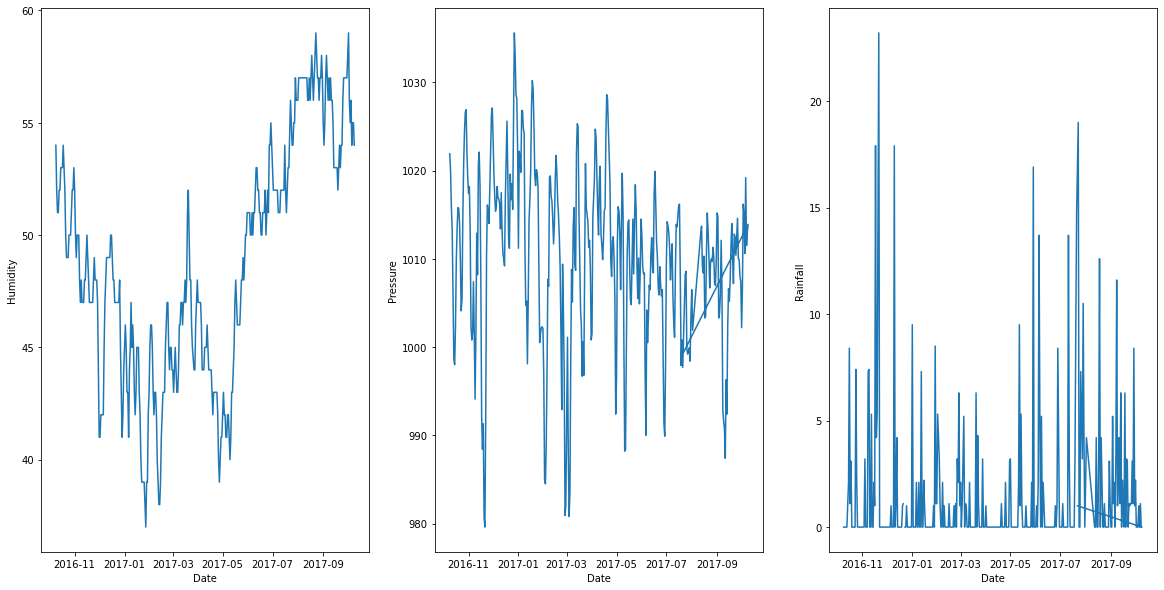

In [218]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,3,1)
plt.plot(df['DateTime'],df['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
fig.add_subplot(1,3,2)
plt.plot(df['DateTime'],df['Baro'])
plt.xlabel('Date')
plt.ylabel('Pressure')
fig.add_subplot(1,3,3)
plt.plot(df['DateTime'],df['mm'])
plt.xlabel('Date')
plt.ylabel('Rainfall')

Text(0, 0.5, 'Pressure')

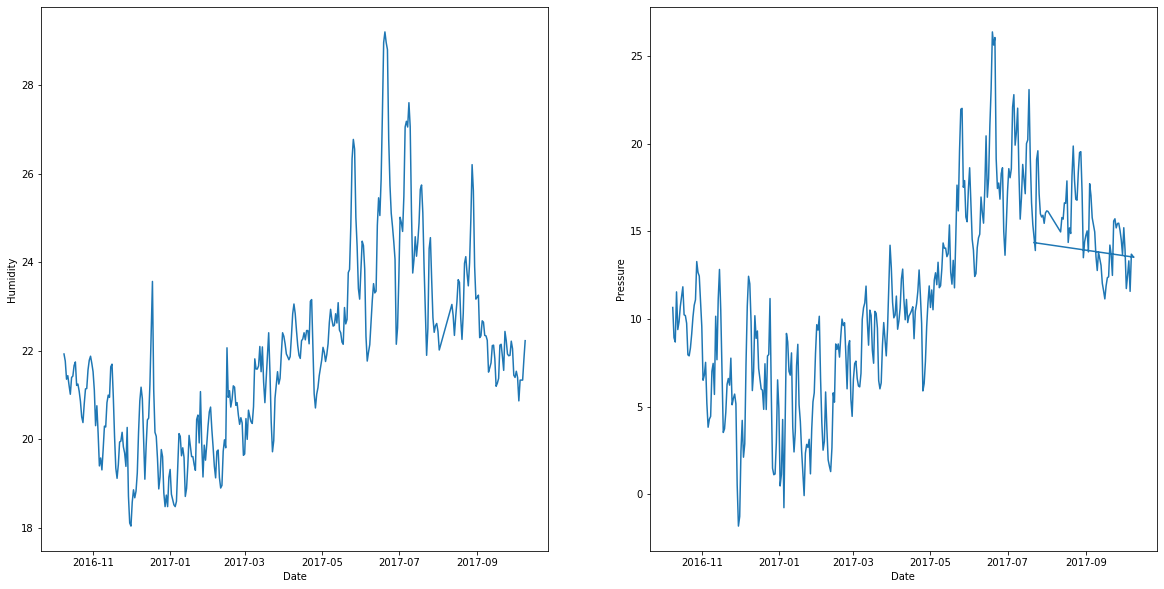

In [219]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
plt.plot(df['DateTime'],df['Indoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Humidity')
fig.add_subplot(1,2,2)
plt.plot(df['DateTime'],df['Outdoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Pressure')

Text(0, 0.5, 'Outdoor Temperature_range (high)')

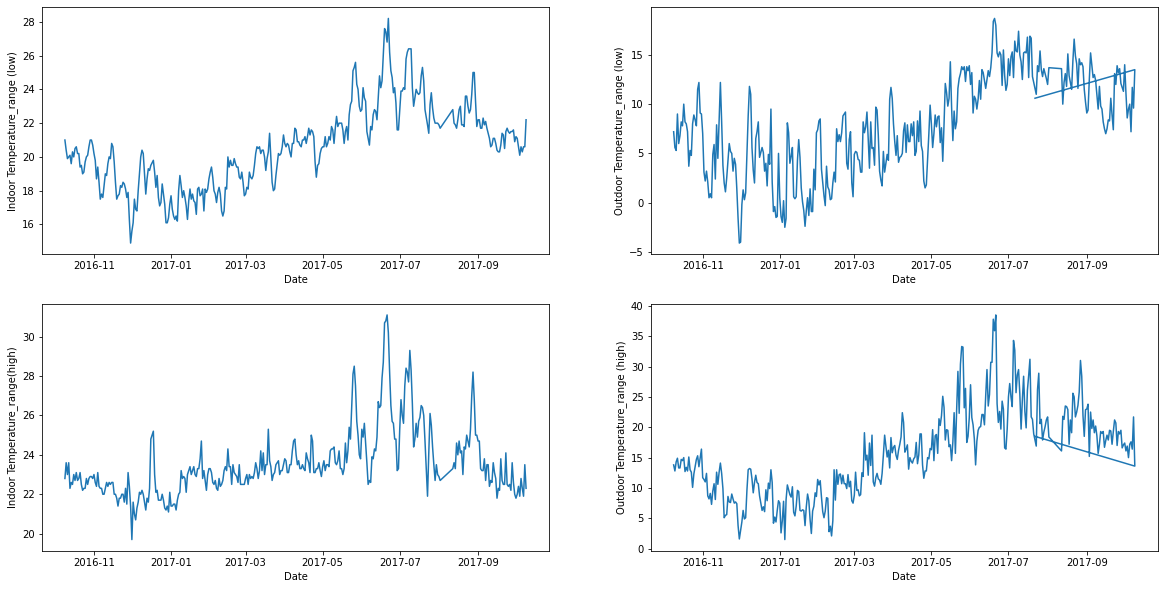

In [221]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
plt.plot(df['DateTime'],df['Indoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range (low)')
fig.add_subplot(2,2,2)
plt.plot(df['DateTime'],df['Outdoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (low)')
fig.add_subplot(2,2,3)
plt.plot(df['DateTime'],df['Indoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range(high)')
fig.add_subplot(2,2,4)
plt.plot(df['DateTime'],df['Outdoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (high)')

## Mean Plots

Text(0, 0.5, 'Outdoor Temperature')

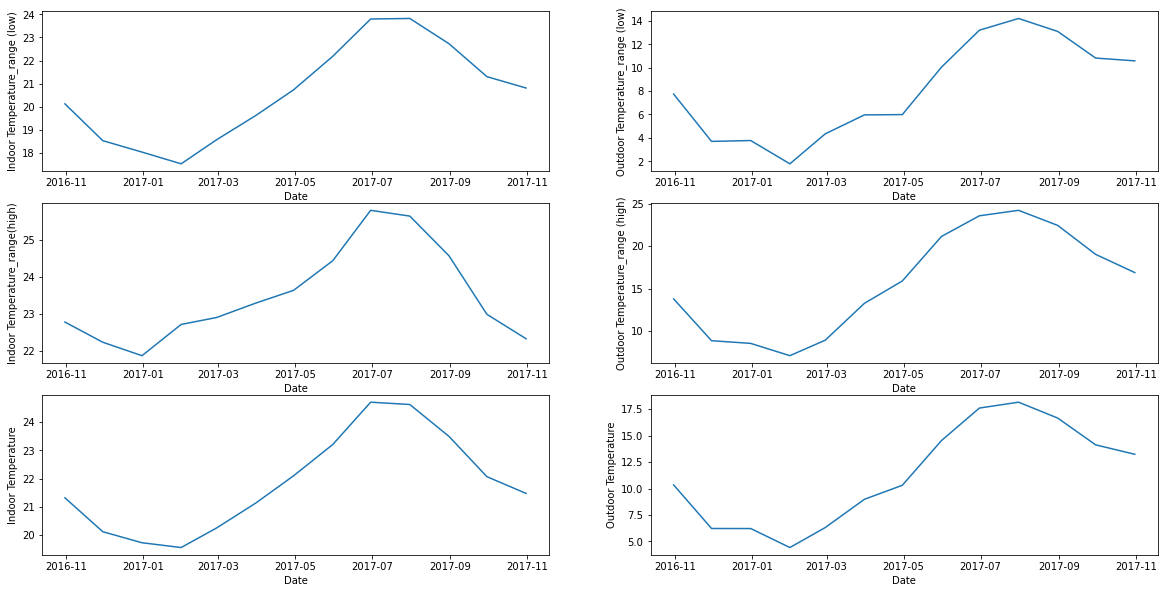

In [234]:
monthly_df_mean = df.groupby(pd.Grouper(key='DateTime', freq='M')).mean().reset_index()
fig = plt.figure(figsize=(20,10))
fig.add_subplot(3,2,1)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Indoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range (low)')
fig.add_subplot(3,2,2)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Outdoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (low)')
fig.add_subplot(3,2,3)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Indoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range(high)')
fig.add_subplot(3,2,4)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Outdoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (high)')
fig.add_subplot(3,2,5)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Indoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature')
fig.add_subplot(3,2,6)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Outdoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature')

In [276]:
monthly_df_mean.diff().max(),monthly_df_mean.diff().idxmax()

(Humidity                             6.436559
 Indoor Temperature                   1.494753
 Indoor Temperature_range (low)       1.612796
 Indoor Temperature_range (high)      1.364516
 Outdoor Temperature                  4.225946
 Outdoor Temperature_range (low)      4.055269
 Outdoor Temperature_range (high)     5.242258
 mm                                   1.920000
 Baro                                11.386667
 dtype: float64,
 Humidity                           2017-06-30
 Indoor Temperature                 2017-06-30
 Indoor Temperature_range (low)     2017-06-30
 Indoor Temperature_range (high)    2017-06-30
 Outdoor Temperature                2017-05-31
 Outdoor Temperature_range (low)    2017-05-31
 Outdoor Temperature_range (high)   2017-05-31
 mm                                 2016-11-30
 Baro                               2016-12-31
 dtype: datetime64[ns])

In [278]:
monthly_df_mean.diff().min(),monthly_df_mean.diff().idxmin()

(Humidity                           -3.388406
 Indoor Temperature                 -1.422303
 Indoor Temperature_range (low)     -1.592754
 Indoor Temperature_range (high)    -1.584848
 Outdoor Temperature                -4.117536
 Outdoor Temperature_range (low)    -4.042464
 Outdoor Temperature_range (high)   -4.924928
 mm                                 -2.078621
 Baro                               -9.665438
 dtype: float64,
 Humidity                           2016-11-30
 Indoor Temperature                 2017-09-30
 Indoor Temperature_range (low)     2016-11-30
 Indoor Temperature_range (high)    2017-09-30
 Outdoor Temperature                2016-11-30
 Outdoor Temperature_range (low)    2016-11-30
 Outdoor Temperature_range (high)   2016-11-30
 mm                                 2016-12-31
 Baro                               2017-02-28
 dtype: datetime64[ns])

Text(0, 0.5, 'Pressure')

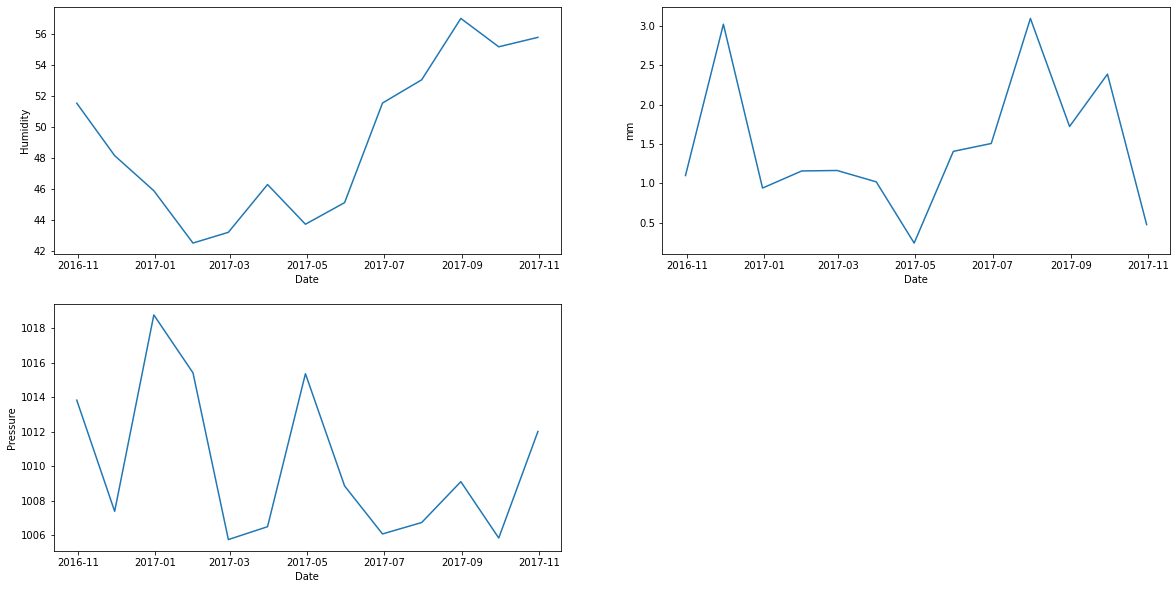

In [235]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
fig.add_subplot(2,2,2)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['mm'])
plt.xlabel('Date')
plt.ylabel('mm')
fig.add_subplot(2,2,3)
plt.plot(monthly_df_mean['DateTime'],monthly_df_mean['Baro'])
plt.xlabel('Date')
plt.ylabel('Pressure')

In [258]:
monthly_df_mean.set_index('DateTime',inplace=True)
monthly_df_mean.idxmin(),monthly_df_mean.min()

(Humidity                           2017-01-31
 Indoor Temperature                 2017-01-31
 Indoor Temperature_range (low)     2017-01-31
 Indoor Temperature_range (high)    2016-12-31
 Outdoor Temperature                2017-01-31
 Outdoor Temperature_range (low)    2017-01-31
 Outdoor Temperature_range (high)   2017-01-31
 mm                                 2017-04-30
 Baro                               2017-02-28
 dtype: datetime64[ns],
 Humidity                              42.483871
 Indoor Temperature                    19.563226
 Indoor Temperature_range (low)        17.532258
 Indoor Temperature_range (high)       21.863333
 Outdoor Temperature                    4.424839
 Outdoor Temperature_range (low)        1.780645
 Outdoor Temperature_range (high)       7.090323
 mm                                     0.243333
 Baro                                1005.757143
 dtype: float64)

In [269]:
monthly_df_mean.idxmax(),monthly_df_mean.max()

(Humidity                           2017-08-31
 Indoor Temperature                 2017-06-30
 Indoor Temperature_range (low)     2017-07-31
 Indoor Temperature_range (high)    2017-06-30
 Outdoor Temperature                2017-07-31
 Outdoor Temperature_range (low)    2017-07-31
 Outdoor Temperature_range (high)   2017-07-31
 mm                                 2017-07-31
 Baro                               2016-12-31
 dtype: datetime64[ns],
 Humidity                              57.000000
 Indoor Temperature                    24.697333
 Indoor Temperature_range (low)        23.820000
 Indoor Temperature_range (high)       25.800000
 Outdoor Temperature                   18.156129
 Outdoor Temperature_range (low)       14.200000
 Outdoor Temperature_range (high)      24.209677
 mm                                     3.093548
 Baro                                1018.780000
 dtype: float64)

In [277]:
monthly_df_mean

,Humidity,Indoor Temperature,Indoor Temperature_range (low),Indoor Temperature_range (high),Outdoor Temperature,Outdoor Temperature_range (low),Outdoor Temperature_range (high),mm,Baro
DateTime,,,,,,,,,
2016-10-31,51.521739,21.319565,20.126087,22.773913,10.340870,7.739130,13.778261,1.100000,1013.839130
2016-11-30,48.133333,20.121333,18.533333,22.226667,6.223333,3.696667,8.853333,3.020000,1007.393333
2016-12-31,45.866667,19.732667,18.040000,21.863333,6.218667,3.770000,8.536667,0.941379,1018.780000
2017-01-31,42.483871,19.563226,17.532258,22.709677,4.424839,1.780645,7.090323,1.158065,1015.422581
2017-02-28,43.178571,20.252857,18.571429,22.896429,6.312500,4.342857,8.914286,1.164286,1005.757143
2017-03-31,46.266667,21.132333,19.620000,23.286667,8.982333,5.960000,13.256667,1.020000,1006.503333
2017-04-30,43.700000,22.097667,20.733333,23.633333,10.305667,5.986667,15.890000,0.243333,1015.373333
2017-05-31,45.096774,23.202581,22.183871,24.435484,14.531613,10.041935,21.132258,1.406667,1008.864516
2017-06-30,51.533333,24.697333,23.796667,25.800000,17.601000,13.196667,23.566667,1.506667,1006.083333


In [290]:
df.iloc[:-10].groupby(pd.Grouper(key='DateTime',freq='M')).sum().min(),df.iloc[:-10].groupby(pd.Grouper(key='DateTime',freq='M')).sum().idxmin()

(Humidity                             1185.00
 Indoor Temperature                    490.35
 Indoor Temperature_range (low)        462.90
 Indoor Temperature_range (high)       523.80
 Outdoor Temperature                   137.17
 Outdoor Temperature_range (low)        55.20
 Outdoor Temperature_range (high)      219.80
 mm                                      7.30
 Baro                                22200.50
 dtype: float64,
 Humidity                           2016-10-31
 Indoor Temperature                 2016-10-31
 Indoor Temperature_range (low)     2016-10-31
 Indoor Temperature_range (high)    2016-10-31
 Outdoor Temperature                2017-01-31
 Outdoor Temperature_range (low)    2017-01-31
 Outdoor Temperature_range (high)   2017-01-31
 mm                                 2017-04-30
 Baro                               2017-08-31
 dtype: datetime64[ns])

In [283]:
df.groupby(pd.Grouper(key='DateTime',freq='M')).sum().max(),df.groupby(pd.Grouper(key='DateTime',freq='M')).sum().idxmax()

(Humidity                             1655.00
 Indoor Temperature                    740.92
 Indoor Temperature_range (low)        714.60
 Indoor Temperature_range (high)       774.00
 Outdoor Temperature                   562.84
 Outdoor Temperature_range (low)       440.20
 Outdoor Temperature_range (high)      750.50
 mm                                     95.90
 Baro                                31478.10
 dtype: float64,
 Humidity                           2017-09-30
 Indoor Temperature                 2017-06-30
 Indoor Temperature_range (low)     2017-07-31
 Indoor Temperature_range (high)    2017-06-30
 Outdoor Temperature                2017-07-31
 Outdoor Temperature_range (low)    2017-07-31
 Outdoor Temperature_range (high)   2017-07-31
 mm                                 2017-07-31
 Baro                               2017-01-31
 dtype: datetime64[ns])

## Standard Deviation Plots

Text(0, 0.5, 'Outdoor Temperature')

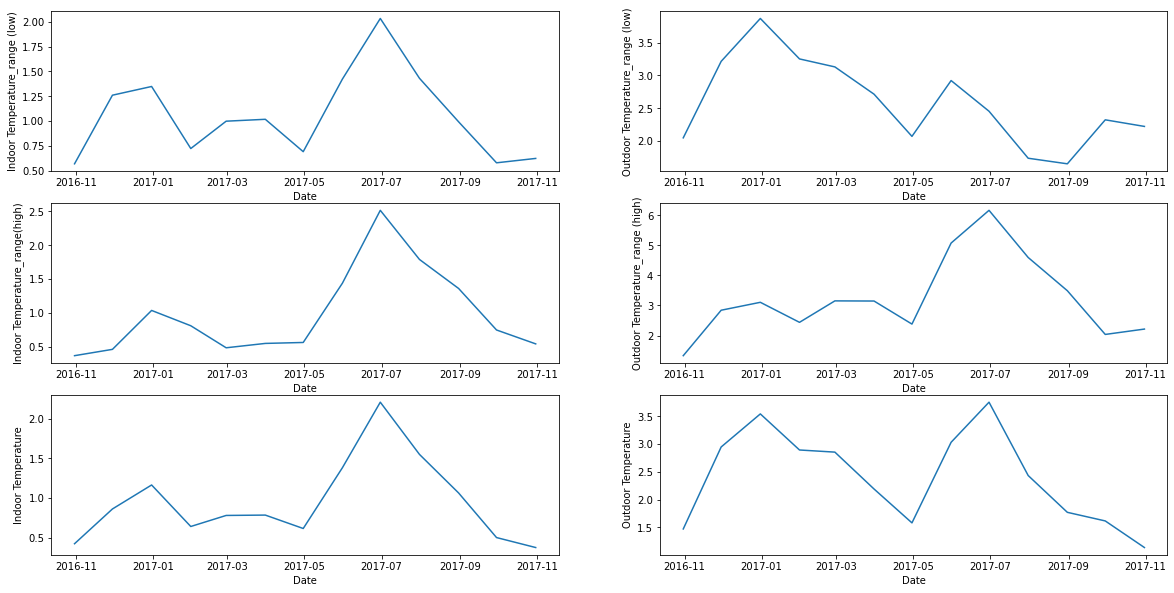

In [252]:
monthly_df_std = df.groupby(pd.Grouper(key='DateTime', freq='M')).std().reset_index()
fig = plt.figure(figsize=(20,10))
fig.add_subplot(3,2,1)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Indoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range (low)')
fig.add_subplot(3,2,2)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Outdoor Temperature_range (low)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (low)')
fig.add_subplot(3,2,3)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Indoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature_range(high)')
fig.add_subplot(3,2,4)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Outdoor Temperature_range (high)'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature_range (high)')
fig.add_subplot(3,2,5)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Indoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature')
fig.add_subplot(3,2,6)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Outdoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature')

Text(0, 0.5, 'Pressure')

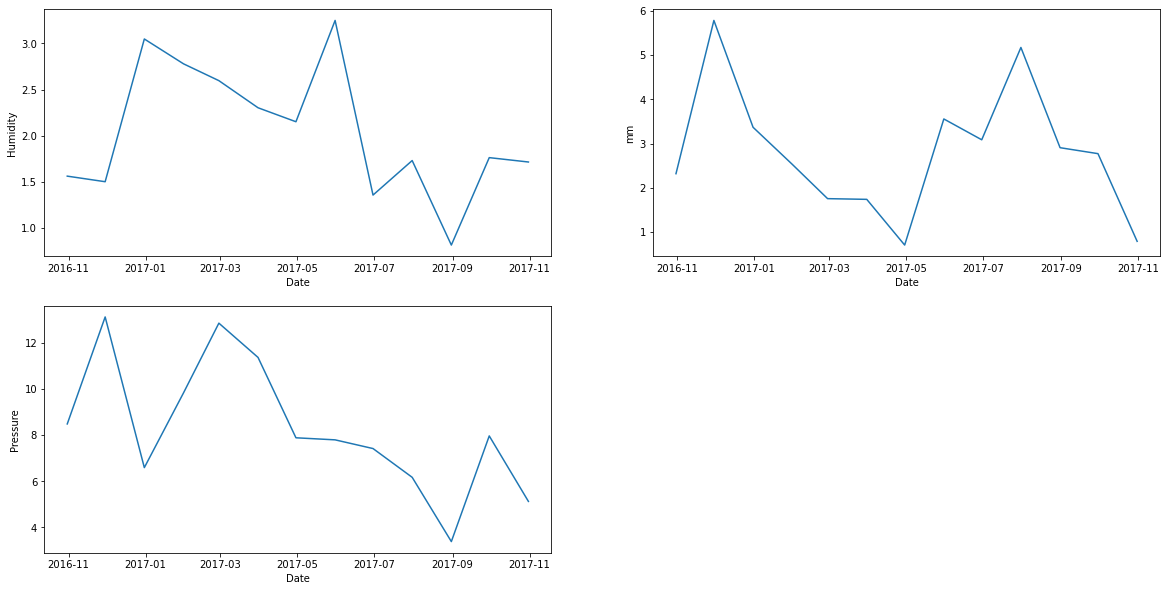

In [233]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,2,1)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
fig.add_subplot(2,2,2)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['mm'])
plt.xlabel('Date')
plt.ylabel('mm')
fig.add_subplot(2,2,3)
plt.plot(monthly_df_std['DateTime'],monthly_df_std['Baro'])
plt.xlabel('Date')
plt.ylabel('Pressure')

In [255]:
monthly_df_std.set_index('DateTime',inplace=True)
monthly_df_std.idxmin(),monthly_df_std.min()

(Humidity                           2017-08-31
 Indoor Temperature                 2017-10-31
 Indoor Temperature_range (low)     2016-10-31
 Indoor Temperature_range (high)    2016-10-31
 Outdoor Temperature                2017-10-31
 Outdoor Temperature_range (low)    2017-08-31
 Outdoor Temperature_range (high)   2016-10-31
 mm                                 2017-04-30
 Baro                               2017-08-31
 dtype: datetime64[ns],
 Humidity                            0.816497
 Indoor Temperature                  0.374218
 Indoor Temperature_range (low)      0.569064
 Indoor Temperature_range (high)     0.368310
 Outdoor Temperature                 1.138594
 Outdoor Temperature_range (low)     1.654693
 Outdoor Temperature_range (high)    1.331082
 mm                                  0.705976
 Baro                                3.384741
 dtype: float64)

In [257]:
monthly_df_std.idxmax(),monthly_df_std.max()

(Humidity                           2017-05-31
 Indoor Temperature                 2017-06-30
 Indoor Temperature_range (low)     2017-06-30
 Indoor Temperature_range (high)    2017-06-30
 Outdoor Temperature                2017-06-30
 Outdoor Temperature_range (low)    2016-12-31
 Outdoor Temperature_range (high)   2017-06-30
 mm                                 2016-11-30
 Baro                               2016-11-30
 dtype: datetime64[ns],
 Humidity                             3.249152
 Indoor Temperature                   2.210715
 Indoor Temperature_range (low)       2.034442
 Indoor Temperature_range (high)      2.516155
 Outdoor Temperature                  3.755262
 Outdoor Temperature_range (low)      3.865957
 Outdoor Temperature_range (high)     6.161747
 mm                                   5.784188
 Baro                                13.117872
 dtype: float64)

# Seasonal Changes

In [313]:
df['Season']=None
for i in range(len(df)):
    if df.iloc[i]['DateTime']<=pd.to_datetime('2016-11-30') and df.iloc[i]['DateTime']>=pd.to_datetime('2016-09-01'):
        df.iloc[i,-1]='Autumn'
    elif df.iloc[i]['DateTime']<=pd.to_datetime('2017-02-28') and df.iloc[i]['DateTime']>=pd.to_datetime('2016-12-01'):
        df.iloc[i,-1]='Winter'
    elif df.iloc[i]['DateTime']<=pd.to_datetime('2017-05-31') and df.iloc[i]['DateTime']>=pd.to_datetime('2017-03-01'):
        df.iloc[i,-1]='Spring'
    elif df.iloc[i]['DateTime']<=pd.to_datetime('2017-08-31') and df.iloc[i]['DateTime']>=pd.to_datetime('2017-06-01'):
        df.iloc[i,-1]='Summer'

In [317]:
df.groupby('Season').mean()

,Humidity,Indoor Temperature,Indoor Temperature_range (low),Indoor Temperature_range (high),Outdoor Temperature,Outdoor Temperature_range (low),Outdoor Temperature_range (high),mm,Baro
Season,,,,,,,,,
Autumn,49.603774,20.641321,19.224528,22.464151,8.010189,5.450943,10.990566,2.186792,1010.190566
Spring,45.021978,22.155824,20.860440,23.792308,11.309011,7.359341,16.807692,0.890000,1010.231868
Summer,53.548780,24.342927,23.518293,25.412195,17.557831,13.543373,23.506024,2.156627,1007.133735
Winter,43.842697,19.837303,18.030337,22.483146,5.623371,3.257303,8.151685,1.088636,1013.513483


In [318]:
df.groupby('Season').std()

,Humidity,Indoor Temperature,Indoor Temperature_range (low),Indoor Temperature_range (high),Outdoor Temperature,Outdoor Temperature_range (low),Outdoor Temperature_range (high),mm,Baro
Season,,,,,,,,,
Autumn,2.273083,0.921324,1.287948,0.501189,3.164344,3.410032,3.365336,4.675182,11.696355
Spring,2.796736,1.297910,1.511502,1.061051,3.337653,3.218902,4.952446,2.346647,9.795530
Summer,2.597018,1.782268,1.644154,2.040479,2.883570,2.049640,4.976539,3.982498,6.149346
Winter,3.154718,0.926447,1.124460,0.923953,3.205753,3.572651,2.980890,2.613380,11.302898


Text(0, 0.5, 'Pressure')

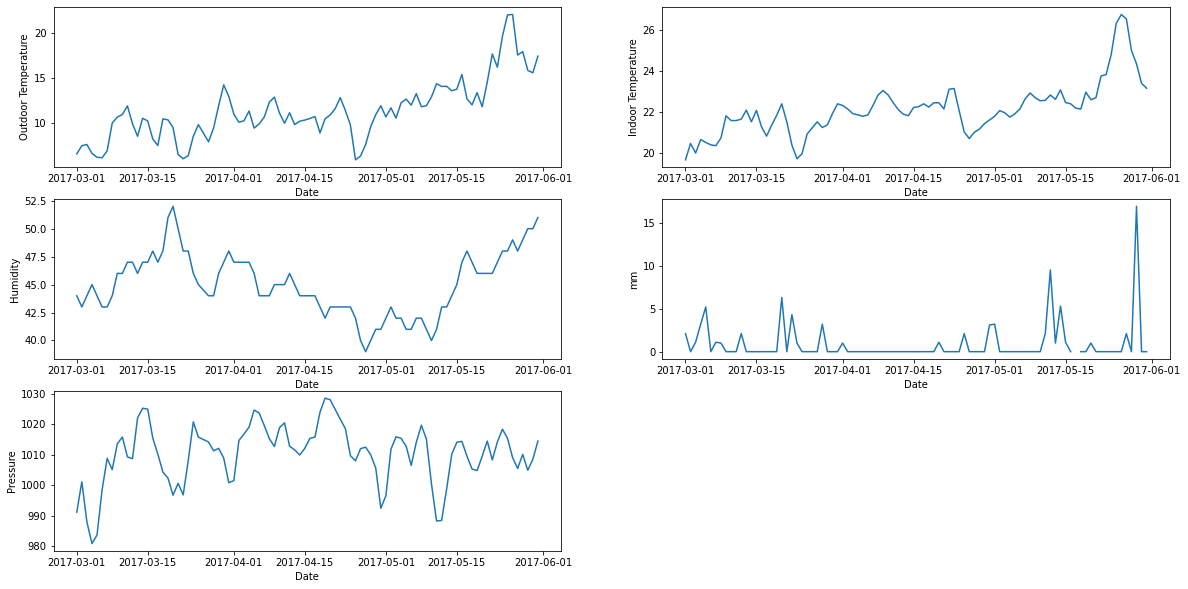

In [330]:
fig=plt.figure(figsize=(20,10))
fig.add_subplot(3,2,1)
plt.plot(df[df['Season']=='Spring'].index,df[df['Season']=='Spring']['Outdoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Outdoor Temperature')
fig.add_subplot(3,2,2)
plt.plot(df[df['Season']=='Spring'].index,df[df['Season']=='Spring']['Indoor Temperature'])
plt.xlabel('Date')
plt.ylabel('Indoor Temperature')
fig.add_subplot(3,2,3)
plt.plot(df[df['Season']=='Spring'].index,df[df['Season']=='Spring']['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
fig.add_subplot(3,2,4)
plt.plot(df[df['Season']=='Spring'].index,df[df['Season']=='Spring']['mm'])
plt.xlabel('Date')
plt.ylabel('mm')
fig.add_subplot(3,2,5)
plt.plot(df[df['Season']=='Spring'].index,df[df['Season']=='Spring']['Baro'])
plt.xlabel('Date')
plt.ylabel('Pressure')

In [384]:
autumn_mean=df[df['Season']=='Spring'].groupby('Season').mean().reset_index()
autumn_std=df[df['Season']=='Spring'].groupby('Season').std().reset_index()
autumn=pd.concat([autumn_mean,autumn_std]).reset_index()
#autumn.columns=['Mean','Standard Deviation']
autumn.columns=['index','Season','Humidity(%)','Indoor Temperature(°C)','Indoor Temperature low(°C)','Indoor Temperature high(°C)','Outdoor Temperature(°C)','Outdoor Temperature low(°C)','Outdoor Temperature high(°C)','Rainfall(mm)','Atmospheric Pressure(hPa)']
autumn=autumn.T.iloc[2:]
autumn.columns=['Mean','Standard Deviation']
autumn

,Mean,Standard Deviation
Humidity(%),45.021978,2.796736
Indoor Temperature(°C),22.155824,1.29791
Indoor Temperature low(°C),20.86044,1.511502
Indoor Temperature high(°C),23.792308,1.061051
Outdoor Temperature(°C),11.309011,3.337653
Outdoor Temperature low(°C),7.359341,3.218902
Outdoor Temperature high(°C),16.807692,4.952446
Rainfall(mm),0.89,2.346647
Atmospheric Pressure(hPa),1010.231868,9.79553
